In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

plt.style.use("seaborn")
sns.set()

In [2]:
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

In [3]:
import plotly.graph_objs as go
import numpy as np

In [4]:
sns.set(style="ticks", color_codes=True)

In [5]:
global_df = pd.read_csv('global_disaster_vs_temps.csv')

In [6]:
global_df.rename(columns={'disastertype_extreme temperature ':'disastertype_extreme temperature'}, inplace=True)

In [7]:
global_df.head(5)

,year,disastertype_drought,disastertype_earthquake,disastertype_extreme temperature,disastertype_flood,disastertype_landslide,disastertype_mass movement (dry),disastertype_storm,disastertype_volcanic activity,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1960,0,7,0,2,1,0,3,1,8.583750,0.093500,14.317417,0.149417,2.932583,0.137583,15.291917,0.069333
1,1961,0,1,0,2,1,0,5,0,8.797667,0.097000,14.514917,0.165750,3.128750,0.181750,15.379917,0.067167
2,1962,0,2,0,1,0,1,3,0,8.745917,0.132917,14.540167,0.158917,3.008583,0.204417,15.325583,0.072500
3,1963,0,2,0,2,1,1,6,2,8.856000,0.092333,14.612250,0.152750,3.157583,0.182417,15.376667,0.068333
4,1964,3,6,0,10,0,0,9,1,8.409667,0.092500,14.156833,0.156333,2.768833,0.157000,15.117083,0.065167


In [8]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       56 non-null     int64  
 1   disastertype_drought                       56 non-null     int64  
 2   disastertype_earthquake                    56 non-null     int64  
 3   disastertype_extreme temperature           56 non-null     int64  
 4   disastertype_flood                         56 non-null     int64  
 5   disastertype_landslide                     56 non-null     int64  
 6   disastertype_mass movement (dry)           56 non-null     int64  
 7   disastertype_storm                         56 non-null     int64  
 8   disastertype_volcanic activity             56 non-null     int64  
 9   LandAverageTemperature                     56 non-null     float64
 10  LandAverageTemperatureUncert

In [9]:
global_df.head()

,year,disastertype_drought,disastertype_earthquake,disastertype_extreme temperature,disastertype_flood,disastertype_landslide,disastertype_mass movement (dry),disastertype_storm,disastertype_volcanic activity,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1960,0,7,0,2,1,0,3,1,8.583750,0.093500,14.317417,0.149417,2.932583,0.137583,15.291917,0.069333
1,1961,0,1,0,2,1,0,5,0,8.797667,0.097000,14.514917,0.165750,3.128750,0.181750,15.379917,0.067167
2,1962,0,2,0,1,0,1,3,0,8.745917,0.132917,14.540167,0.158917,3.008583,0.204417,15.325583,0.072500
3,1963,0,2,0,2,1,1,6,2,8.856000,0.092333,14.612250,0.152750,3.157583,0.182417,15.376667,0.068333
4,1964,3,6,0,10,0,0,9,1,8.409667,0.092500,14.156833,0.156333,2.768833,0.157000,15.117083,0.065167


## Questions to answer:
- How has temperature changed over time?
- How have each natural disaster type changed over time?
- What's the relationship between the change in temp and the change in disasters?
- How will the temperature look in the future?

## How has the global temperature changed over time?

In [10]:
trace = go.Scatter(
    x = global_df.year,
    y = global_df.LandAverageTemperature,
    mode = 'markers'
)

In [11]:
data=[trace]

In [12]:
layout= go.Layout(
    title= 'Global Average Land Temperatures by Year',
    xaxis= dict(title= 'Year'),
    yaxis= dict(title= 'Average Land Temperature (Celsius)')
)

In [13]:
fig= go.Figure(data=data, layout=layout)

In [14]:
offline.iplot(fig)

## Linear regression of temperature data

In [15]:
df_train = global_df.iloc[:48].copy()
df_test = global_df.iloc[48:].copy()

In [16]:
lm = LinearRegression(fit_intercept=True)

In [17]:
lm.fit(X = df_train.year.to_frame(), y=df_train.LandAverageTemperature)

LinearRegression()

In [18]:
slope = lm.coef_
slope

array([0.02185576])

In [19]:
intercept = lm.intercept_
intercept

-34.40124160666041

In [82]:
df_train['lm_temp_prediction'] = lm.predict(df_train.year.to_frame())
df_train.head()

,year,disastertype_drought,disastertype_earthquake,disastertype_extreme temperature,disastertype_flood,disastertype_landslide,disastertype_mass movement (dry),disastertype_storm,disastertype_volcanic activity,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,lm_temp_prediction
0,1960,0,7,0,2,1,0,3,1,8.583750,0.093500,14.317417,0.149417,2.932583,0.137583,15.291917,0.069333,8.436054
1,1961,0,1,0,2,1,0,5,0,8.797667,0.097000,14.514917,0.165750,3.128750,0.181750,15.379917,0.067167,8.457910
2,1962,0,2,0,1,0,1,3,0,8.745917,0.132917,14.540167,0.158917,3.008583,0.204417,15.325583,0.072500,8.479766
3,1963,0,2,0,2,1,1,6,2,8.856000,0.092333,14.612250,0.152750,3.157583,0.182417,15.376667,0.068333,8.501622
4,1964,3,6,0,10,0,0,9,1,8.409667,0.092500,14.156833,0.156333,2.768833,0.157000,15.117083,0.065167,8.523478


In [21]:
x_lin = np.array([1960, 2015])
y_lin = intercept + slope * x_lin

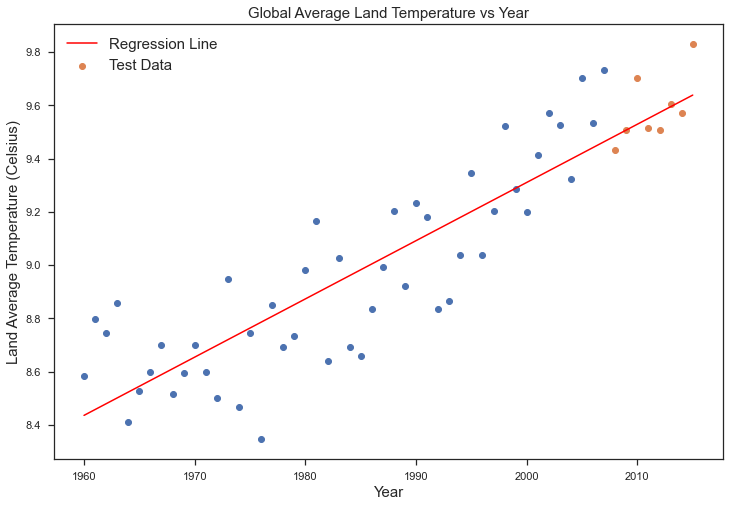

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(x=df_train.year, y=df_train.LandAverageTemperature)
plt.plot(x_lin, y_lin, c="red", label="Regression Line")
plt.scatter(x=df_test.year, y=df_test.LandAverageTemperature, label="Test Data")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Land Average Temperature (Celsius)", fontsize=15)
plt.title("Global Average Land Temperature vs Year", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [23]:
import statsmodels.api as sm

In [24]:
data = global_df.copy()

In [25]:
x = data['year'].tolist()
y = data['LandAverageTemperature'].tolist()

In [26]:
x = sm.add_constant(x)

In [27]:
result = sm.OLS(y,x).fit()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     208.4
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           3.51e-20
Time:                        11:05:48   Log-Likelihood:                 15.791
No. Observations:                  56   AIC:                            -27.58
Df Residuals:                      54   BIC:                            -23.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.0474      3.054    -11.475      0.000     -41.171     -28.924
x1             0.0222      0.002     14.436      0.000       0.019       0.025
==============================================================================
Omnibus:                        0.834   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.851
Skew:                          -0.115   Prob(JB):                        0.653
Kurtosis:                       2.442   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
future_yr = np.linspace(2016, 2040, num=25, dtype='int64')

## Future temperature values

In [41]:
df_future = pd.DataFrame({"year":future_yr})

In [42]:
df_future['lm_temp_prediction'] = lm.predict(df_future.year.to_frame())
df_future

,year,lm_temp_prediction
0,2016,9.659977
1,2017,9.681833
2,2018,9.703689
3,2019,9.725545
4,2020,9.747400
5,2021,9.769256
6,2022,9.791112
7,2023,9.812968
8,2024,9.834823
9,2025,9.856679


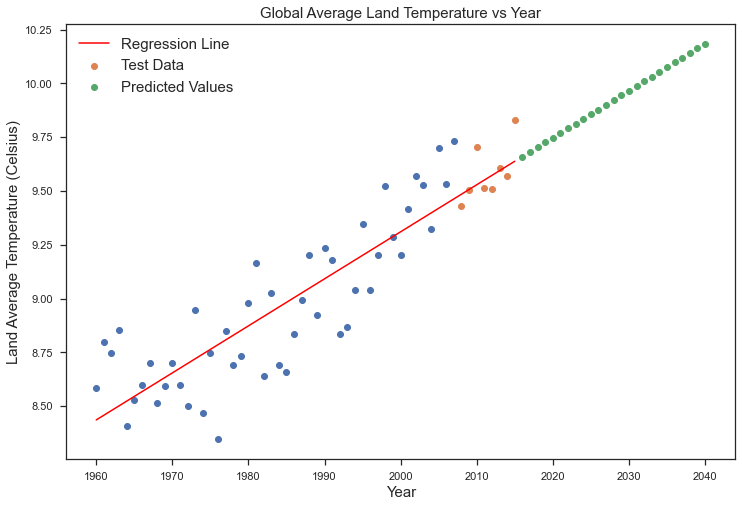

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(x=df_train.year, y=df_train.LandAverageTemperature)
plt.plot(x_lin, y_lin, c="red", label="Regression Line")
plt.scatter(x=df_test.year, y=df_test.LandAverageTemperature, label="Test Data")
plt.scatter(x=df_future.year, y=df_future.lm_temp_prediction, label="Predicted Values")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Land Average Temperature (Celsius)", fontsize=15)
plt.title("Global Average Land Temperature vs Year", fontsize=15)
plt.legend(fontsize=15)
plt.show()

## How have each natural disaster type changed over time?

In [29]:
disasters = global_df[['year', 'LandAndOceanAverageTemperature', 'LandAverageTemperature', 'disastertype_drought', 'disastertype_earthquake', 'disastertype_extreme temperature', 'disastertype_flood', 'disastertype_landslide', "disastertype_mass movement (dry)", 'disastertype_storm', "disastertype_volcanic activity"]]

In [30]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

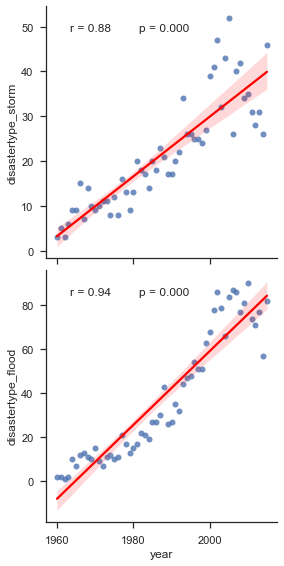

In [80]:
#graph = sns.pairplot(disasters, kind="reg", x_vars='year', y_vars=['disastertype_drought', 'disastertype_earthquake', 'disastertype_extreme temperature', 'disastertype_flood', 'disastertype_landslide', "disastertype_mass movement (dry)", 'disastertype_storm', "disastertype_volcanic activity"], height=4, plot_kws={'line_kws':{'color':'red'}})
graph = sns.pairplot(disasters, kind="reg", x_vars='year', y_vars=['disastertype_storm', 'disastertype_flood'], height=4, plot_kws={'line_kws':{'color':'red'}})
graph.map(corrfunc)
plt.show()

In [69]:
linegraph_df = global_df[['disastertype_drought', 'disastertype_earthquake', 'disastertype_extreme temperature', 'disastertype_flood', 'disastertype_landslide', "disastertype_mass movement (dry)", 'disastertype_storm', "disastertype_volcanic activity"]]
linegraph_df.index = global_df.year
linegraph_df.rename(columns={'disastertype_drought':"Droughts", 'disastertype_earthquake':"Earthquakes", 'disastertype_extreme temperature':"Extreme Temperature", 'disastertype_flood':"Floods", 'disastertype_landslide':"Landslides", "disastertype_mass movement (dry)":"Mass Movement (dry)", 'disastertype_storm':"Storms", "disastertype_volcanic activity":"Volcanic Activity"}, inplace=True)

C:\Users\Jacki\AppData\Local\Temp\ipykernel_13040\1253759293.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0.5, 1.0, 'Number of Disasters by Year')]

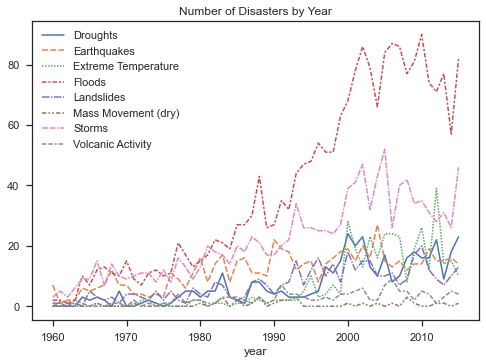

In [76]:
sns.lineplot(data=linegraph_df).set(title='Number of Disasters by Year')

## Disasters vs Temperature

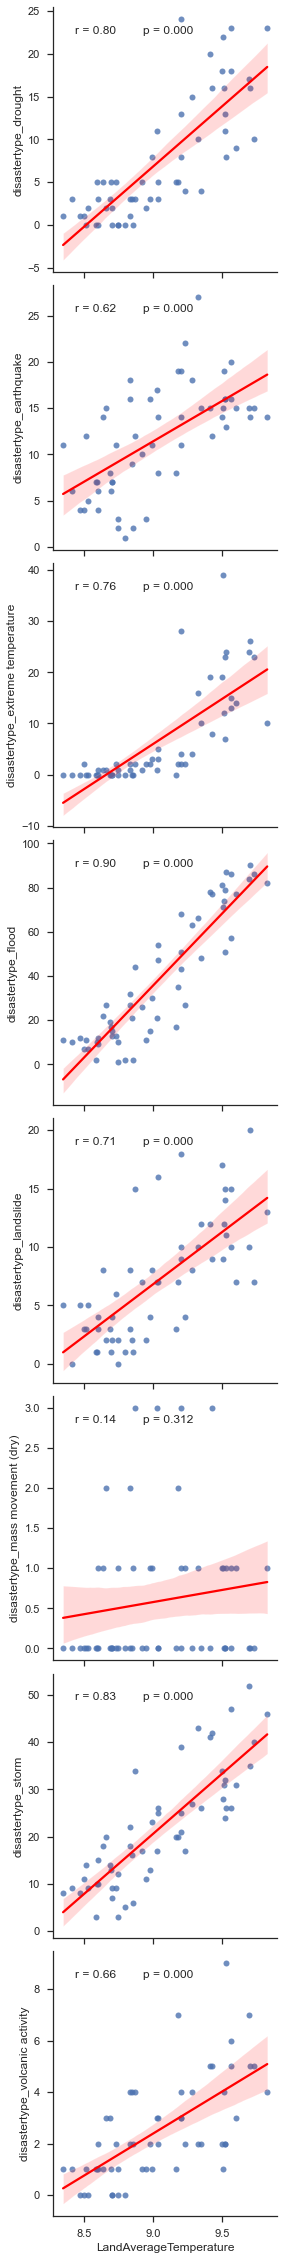

In [32]:
graph = sns.pairplot(disasters, kind="reg", x_vars='LandAverageTemperature', y_vars=['disastertype_drought', 'disastertype_earthquake', 'disastertype_extreme temperature', 'disastertype_flood', 'disastertype_landslide', "disastertype_mass movement (dry)", 'disastertype_storm', "disastertype_volcanic activity"], height=4, plot_kws={'line_kws':{'color':'red'}})
graph.map(corrfunc)
plt.show()

## How are the changes in temperature related to the change in disaster numbers?

In [33]:
delta_temp = disasters.diff()
delta_temp.drop(index=delta_temp.index[0], axis=0, inplace=True)
delta_temp.tail()

,year,LandAndOceanAverageTemperature,LandAverageTemperature,disastertype_drought,disastertype_earthquake,disastertype_extreme temperature,disastertype_flood,disastertype_landslide,disastertype_mass movement (dry),disastertype_storm,disastertype_volcanic activity
51,1.0,-0.126000,-0.187083,0.0,5.0,-14.0,-16.0,-8.0,0.0,-4.0,-1.0
52,1.0,0.032833,-0.008667,6.0,-4.0,27.0,-3.0,-3.0,1.0,-3.0,-3.0
53,1.0,0.052083,0.099167,-13.0,0.0,-25.0,6.0,-2.0,0.0,3.0,2.0
54,1.0,0.058583,-0.035833,9.0,1.0,1.0,-20.0,3.0,-1.0,-5.0,2.0
55,1.0,0.145583,0.260333,5.0,-2.0,-5.0,25.0,3.0,1.0,20.0,-1.0


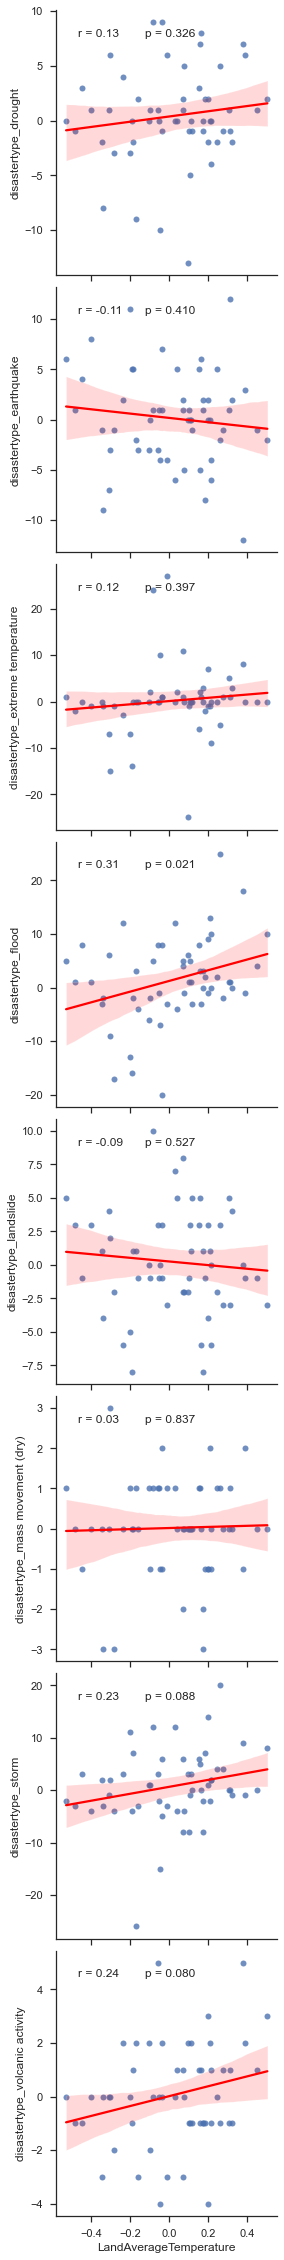

In [34]:
graph = sns.pairplot(delta_temp, kind="reg", x_vars='LandAverageTemperature', y_vars=['disastertype_drought', 'disastertype_earthquake', 'disastertype_extreme temperature', 'disastertype_flood', 'disastertype_landslide', "disastertype_mass movement (dry)", 'disastertype_storm', "disastertype_volcanic activity"], height=4, plot_kws={'line_kws':{'color':'red'}})
graph.map(corrfunc)
plt.show()

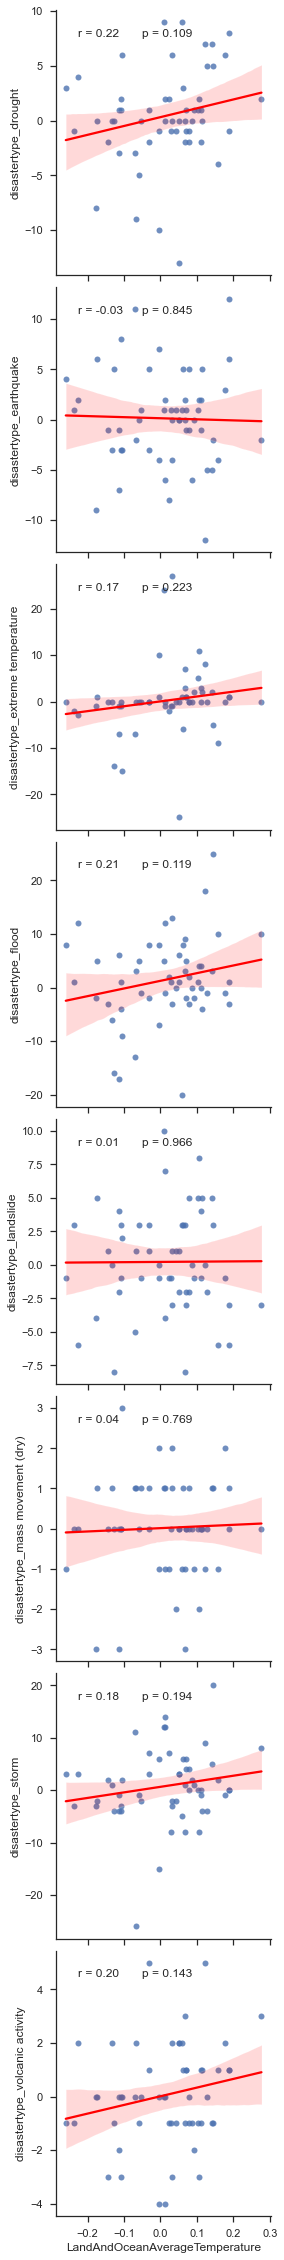

In [35]:
graph  = sns.pairplot(delta_temp, kind="reg", x_vars='LandAndOceanAverageTemperature', y_vars=['disastertype_drought', 'disastertype_earthquake', 'disastertype_extreme temperature', 'disastertype_flood', 'disastertype_landslide', "disastertype_mass movement (dry)", 'disastertype_storm', "disastertype_volcanic activity"], height=4, plot_kws={'line_kws':{'color':'red'}})
graph.map(corrfunc)
plt.show()

## A closer look at flooding

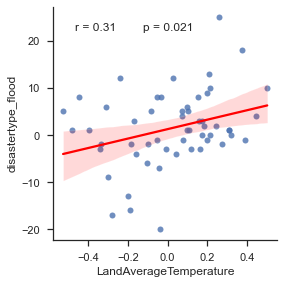

In [81]:
graph  = sns.pairplot(delta_temp, kind="reg", x_vars='LandAverageTemperature', y_vars='disastertype_flood', height=4, plot_kws={'line_kws':{'color':'red'}})
graph.map(corrfunc)
plt.show()

In [89]:
flood_data = delta_temp.copy()
flood_data.head()

,year,LandAndOceanAverageTemperature,LandAverageTemperature,disastertype_drought,disastertype_earthquake,disastertype_extreme temperature,disastertype_flood,disastertype_landslide,disastertype_mass movement (dry),disastertype_storm,disastertype_volcanic activity
1,1.0,0.088000,0.213917,0.0,-6.0,0.0,0.0,0.0,0.0,2.0,-1.0
2,1.0,-0.054333,-0.051750,0.0,1.0,0.0,-1.0,-1.0,1.0,-2.0,0.0
3,1.0,0.051083,0.110083,0.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0
4,1.0,-0.259583,-0.446333,3.0,4.0,0.0,8.0,-1.0,-1.0,3.0,-1.0
5,1.0,0.078667,0.117750,-1.0,-1.0,0.0,-3.0,5.0,0.0,0.0,-1.0


In [84]:
x = flood_data['LandAverageTemperature'].tolist()
y = flood_data['disastertype_flood'].tolist()

In [85]:
x = sm.add_constant(x)

In [86]:
result = sm.OLS(y,x).fit()

In [87]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     5.635
Date:                Wed, 27 Jul 2022   Prob (F-statistic):             0.0213
Time:                        19:37:26   Log-Likelihood:                -189.00
No. Observations:                  55   AIC:                             382.0
Df Residuals:                      53   BIC:                             386.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2275      1.037      1.183      0.242      -0.853       3.308
x1            10.0128      4.218      2.374      0.021       1.553      18.473
==============================================================================
Omnibus:                        1.987   Durbin-Watson:                   2.446
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.253
Skew:                          -0.011   Prob(JB):                        0.534
Kurtosis:                       3.739   Cond. No.                         4.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""